# 1

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import networkx as nx
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv('synthetic_data_lung_cancer.csv')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SUBJECT_ID,560971.0,478.783759,274.017435,1.000000,242.000000,471.000000,701.00000,984.000000
TIME,560971.0,4.160220,2.372683,0.000001,2.166878,4.220659,6.15983,16.866712


In [2]:
label_encoder = LabelEncoder()
data['DEFINITION_ID_encoded'] = label_encoder.fit_transform(data['DEFINITION_ID'])
data['condition'] = data['DEFINITION_ID'].apply(lambda x: 'condition' in x)
data['procedure'] = data['DEFINITION_ID'].apply(lambda x: 'procedure' in x)
data['drug'] = data['DEFINITION_ID'].apply(lambda x: 'drug' in x)
data['observation'] = data['DEFINITION_ID'].apply(lambda x: 'observation' in x)
data['measurement'] = data['DEFINITION_ID'].apply(lambda x: 'measurement' in x)
data.drop(columns=['DEFINITION_ID'], inplace=True)

In [3]:
data['time_since_last'] = data.groupby('SUBJECT_ID')['TIME'].diff().fillna(0)

In [4]:
columns_to_convert = ['condition', 'procedure', 'drug', 'observation', 'measurement']
for column in columns_to_convert:
    data[column] = data[column].astype(int)
data

,SUBJECT_ID,TIME,DEFINITION_ID_encoded,condition,procedure,drug,observation,measurement,time_since_last
0,1,0.004807,2531,0,0,1,0,0,0.000000
1,1,0.008643,1026,1,0,0,0,0,0.003836
2,1,0.027792,2161,1,0,0,0,0,0.019149
3,1,0.032515,2762,0,0,1,0,0,0.004722
4,1,0.056765,3175,0,0,0,0,1,0.024250
...,...,...,...,...,...,...,...,...,...
560966,984,0.027321,2977,0,0,0,0,1,0.001446
560967,984,0.028739,4213,0,0,0,1,0,0.001418
560968,984,0.030802,2976,0,0,0,0,1,0.002063
560969,984,0.035081,3183,0,0,0,0,1,0.004278


In [5]:
data.describe().time_since_last

count    560971.000000
mean          0.006668
std           0.050903
min           0.000000
25%           0.000260
50%           0.000865
75%           0.002926
max           5.825158
Name: time_since_last, dtype: float64

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
time_threshold = 1 
data['DEATH'] = data['time_since_last'].apply(lambda x: 1 if x <= time_threshold else 0)
X = data[['SUBJECT_ID', 'TIME', 'DEFINITION_ID_encoded', 'condition', 'procedure', 'drug', 'observation', 'measurement']]
y = data['DEATH']
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = RandomForestClassifier(class_weight='balanced', random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC AUC: {roc_auc}")


Accuracy: 0.9996880431391774
Precision: 0.9996879040527888
Recall: 1.0
ROC AUC: 0.7941176470588236


In [7]:
patient_data = data[data['SUBJECT_ID'] == 984]
print(patient_data)

        SUBJECT_ID      TIME  DEFINITION_ID_encoded  condition  procedure  \
560908         984  0.000704                   3849          0          0   
560909         984  0.002623                   4006          0          0   
560910         984  0.002856                   3154          0          0   
560911         984  0.002858                   3442          0          0   
560912         984  0.003025                   3787          0          0   
...            ...       ...                    ...        ...        ...   
560966         984  0.027321                   2977          0          0   
560967         984  0.028739                   4213          0          0   
560968         984  0.030802                   2976          0          0   
560969         984  0.035081                   3183          0          0   
560970         984  0.038022                   1799          1          0   

        drug  observation  measurement  time_since_last  DEATH  
560908    

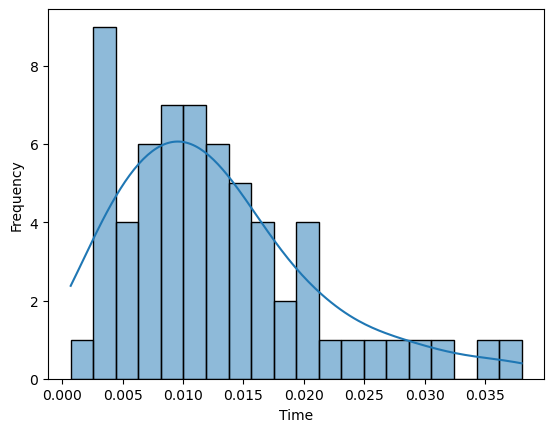

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
patient_ID_data = data[data['SUBJECT_ID'] == 10]
sns.histplot(data=patient_data, x='TIME', bins=20, kde=True)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()